[View in Colaboratory](https://colab.research.google.com/github/gauravsingh1012/AI-Adventures-3/blob/master/Stocks%20Analyzer.ipynb)

# Stock Analysis

This notebook will walk through a basic example of using the stockAnalysis class to analyze a stock. This class is built on the quandl financial library and the fbprophet additive model library but hides all that code behind the scenes so you can focus on making sense of the data! 

In [1]:
!pip install quandl
!pip install fbprophet
!pip install pytrends


    100% |████████████████████████████████| 51kB 3.1MB/s 
  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /content/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
    100% |████████████████████████████████| 3.4MB 6.9MB/s 
    45% |██████████████▌                 | 30.8MB 47.5MB/s eta 0:00:01

    100% |████████████████████████████████| 68.1MB 343kB/s 
  Running setup.py bdist_wheel for fbprophet ... - error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-liiqpml9/fbprophet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-_yw8rfoz --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-liiqpml9/fbprophet/setup.py", line 123, in <module>
      """
    File "/usr/local/lib/python3.6/dist-packages/setuptools/__init__.py", line 129, in setup
      return distutils.core.setup(**attrs)
    File "/usr/lib/python3.6/distutils/core.py", line 148, in setup
      dist.run_c

    100% |████████████████████████████████| 5.8MB 5.6MB/s 


In [1]:
import os

os.chdir('/content')

!rm -rf AI-Adventures-*
!git clone https://github.com/gauravsingh1012/AI-Adventures-3.git

os.chdir('/content/AI-Adventures-3')
!pwd

Cloning into 'AI-Adventures-3'...
remote: Counting objects: 122, done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 122 (delta 67), reused 75 (delta 32), pack-reused 0
Receiving objects: 100% (122/122), 2.34 MiB | 10.67 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/AI-Adventures-3


# Import the Class



In [0]:
from stocksAnalyzerBackend import stockTicker

## Instantiate a Object

An object is an instance of a Python class. To create an object, we call the stockTicker class with a valid stock ticker (there are over 3000 available).

In [0]:
from IPython.display import clear_output
ticker = stockTicker('INFY','NSE')
clear_output()
    

The ticker object contains a number of attributes, or pieces of data, and methods, functions that act on that data. 
One attribute is the stock history, which is a dataframe. We can assign this to a variable and then look at the dataframe.

In [4]:
stock_history = ticker.stock
stock_history.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),ds,Adj. Close,Adj. Open,Adj. Volume,y,Daily Change
0,2011-06-29,2868.00,2907.00,2868.0,2880.0,2881.75,600094.0,17320.05,2011-06-29,2881.75,2868.00,600094.0,2881.75,13.75
1,2011-06-30,2886.05,2919.00,2881.5,2903.1,2910.45,1417730.0,41163.32,2011-06-30,2910.45,2886.05,1417730.0,2910.45,24.40
2,2011-07-01,2935.00,2969.95,2924.1,2928.0,2934.15,800308.0,23549.85,2011-07-01,2934.15,2935.00,800308.0,2934.15,-0.85
3,2011-07-04,2966.65,2977.00,2935.0,2941.0,2938.95,514324.0,15162.29,2011-07-04,2938.95,2966.65,514324.0,2938.95,-27.70
4,2011-07-05,2957.00,2969.90,2926.0,2959.0,2956.45,802966.0,23701.22,2011-07-05,2956.45,2957.00,802966.0,2956.45,-0.55


The advantages of a class is that the data and the functions which act on the data are associated with a single variable. In effect, a class is an uber data-structure because it contains within it other data and functions. Here we will use one of the  methods to plot the history of the stock. 

# Data Exploration

First, a basic plot of the stock history and a few statistics.

In [0]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

Maximum Adj. Close = 4365.90 on 2014-11-27.
Minimum Adj. Close = 873.40 on 2017-08-21.
Current Adj. Close = 1364.10 on 2018-08-03.



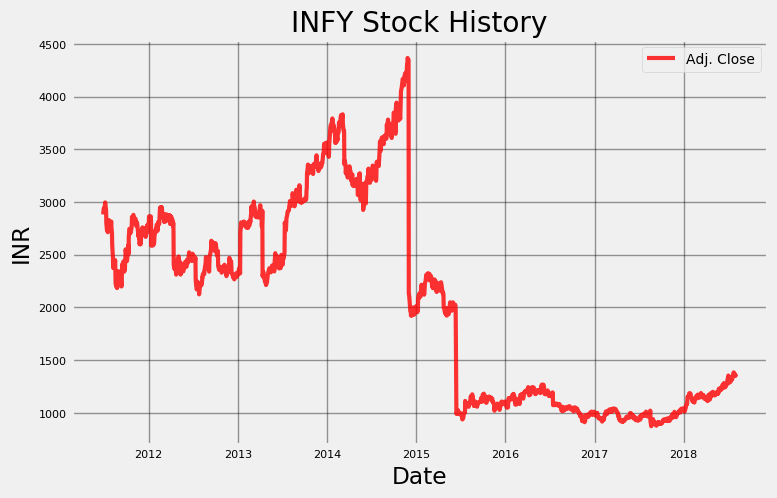

In [6]:
ticker.plot_stock()

The plot_stock method accepts a number of arguments that control the range of data plotted, the statistics plotted, and the type of plot. In a Jupyter notebook, you can type a function, and with your cursor in the parenthesis, press shift + tab to view all the available function parameters. Here we will plot the daily change in price and the daily volumn as a percentage relative to the average value. 

Maximum Daily Change = 228.65 on 2014-10-10.
Minimum Daily Change = -328.40 on 2013-04-12.
Current Daily Change = -2.10 on 2018-08-03.

Maximum Adj. Volume = 82202480.00 on 2017-08-18.
Minimum Adj. Volume = 21694.00 on 2012-03-03.
Current Adj. Volume = 1985195.00 on 2018-08-03.



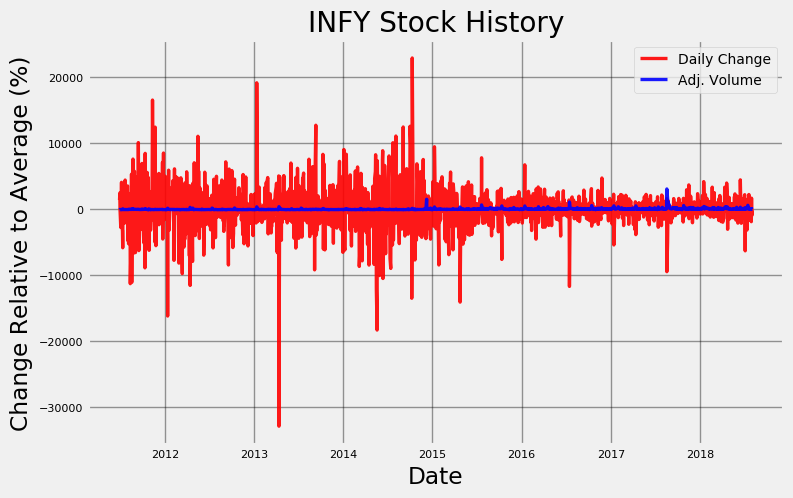

In [8]:
ticker.plot_stock(start_date = '2011-06-29', end_date = '2018-08-03', 
                     stats = ['Daily Change', 'Adj. Volume'], plot_type='pct')

## Potential Profit

If we want to feel good about ourselves, we can pretend as if we had the fortune of mind to invest at the beginning of the given period with 100 shares. We can then evaluate the potential profit we would have from those shares. You can also change the dates if you feel like trying to lose money! 

INFY Total buy and hold profit from 2017-06-29 to 2018-08-03 for 100 shares = INR43390.00


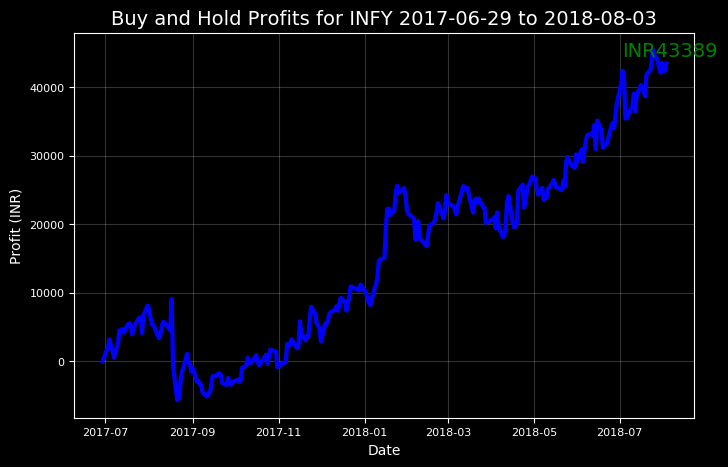

In [9]:
ticker.buy_and_hold(start_date='2017-06-29', end_date='2018-08-03', nshares=100)

INFY Total buy and hold profit from 2014-06-05 to 2015-01-01 for 100 shares = INR-102560.00


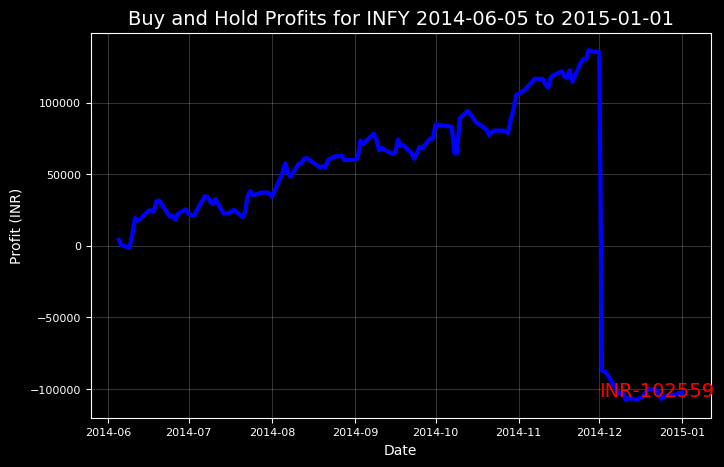

In [10]:
ticker.buy_and_hold(start_date='2014-06-05', end_date='2015-01-01', nshares=100)

Surprisingly, we can lose money playing the stock market! 

# Trends and Patterns

An additive model represents a time series as an overall trend and patterns on different time scales (yearly, monthly, seasonally).
The Prophet library, developed by Facebook provides simple implementations of additive models. It also has advanced capabilities for those willing to dig into the code. The ticker object does the tough work for us so we can use it to just see the results. 
Another method allows us to create a prophet model and inspect the results. This method returns two objects, model and data, which we need to save to plot the different trends and patterns.

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


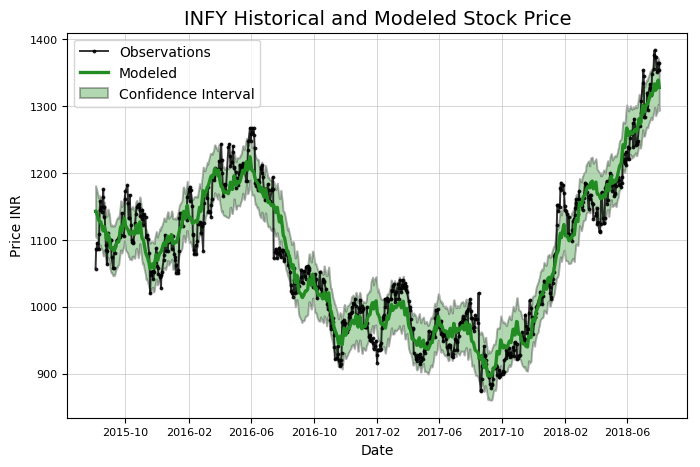

In [11]:
model, model_data = ticker.create_prophet_model()

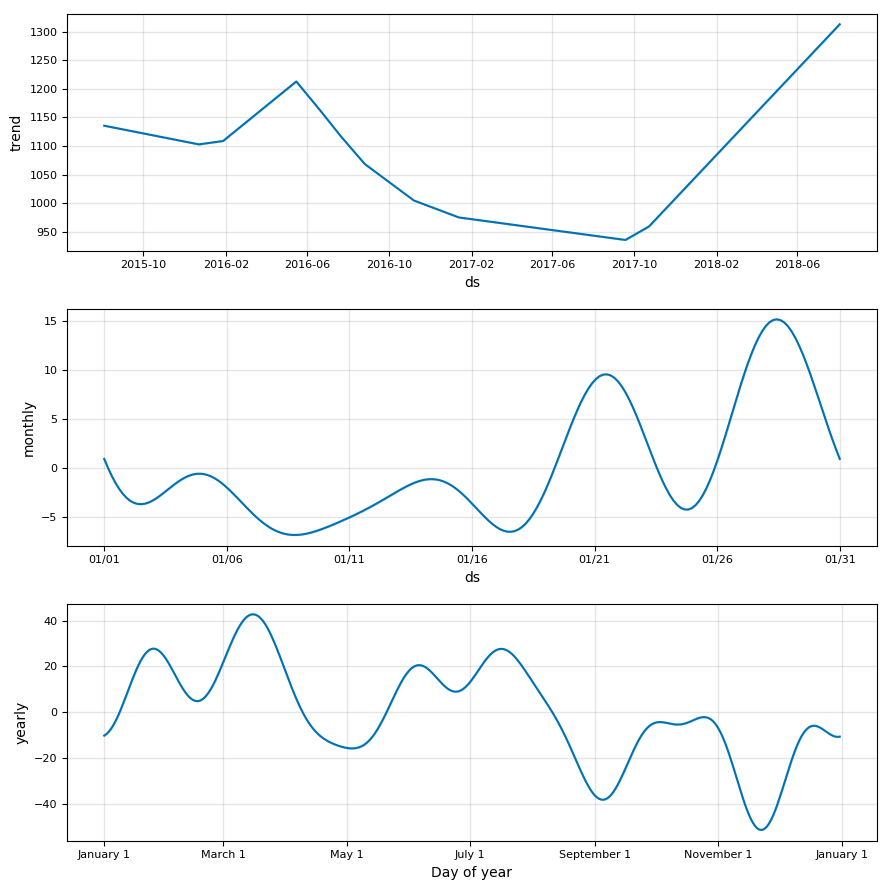

In [12]:
model.plot_components(model_data)
plt.show()

The trend over the course of a year appears to be give some clues

If we think there may be meaningful weekly trends, we can add in a weekly seasonality component by modifying the associated attribute on our object. We then recreate the model and plot the components. 

In [13]:
print(ticker.weekly_seasonality)
ticker.weekly_seasonality = True
print(ticker.weekly_seasonality)

False
True


/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


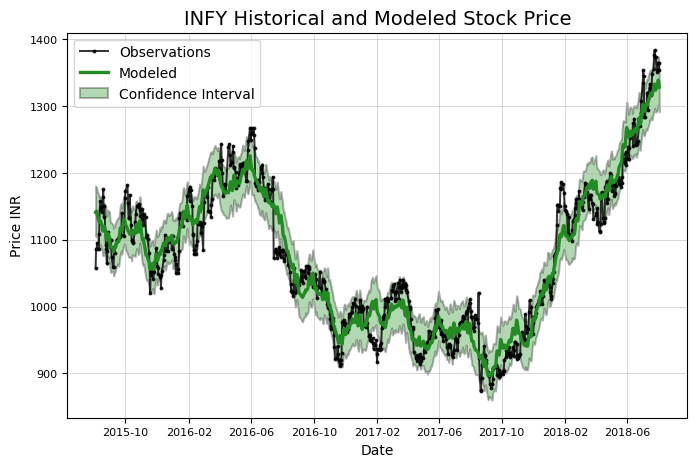

In [14]:
model, model_data = ticker.create_prophet_model(days=0)

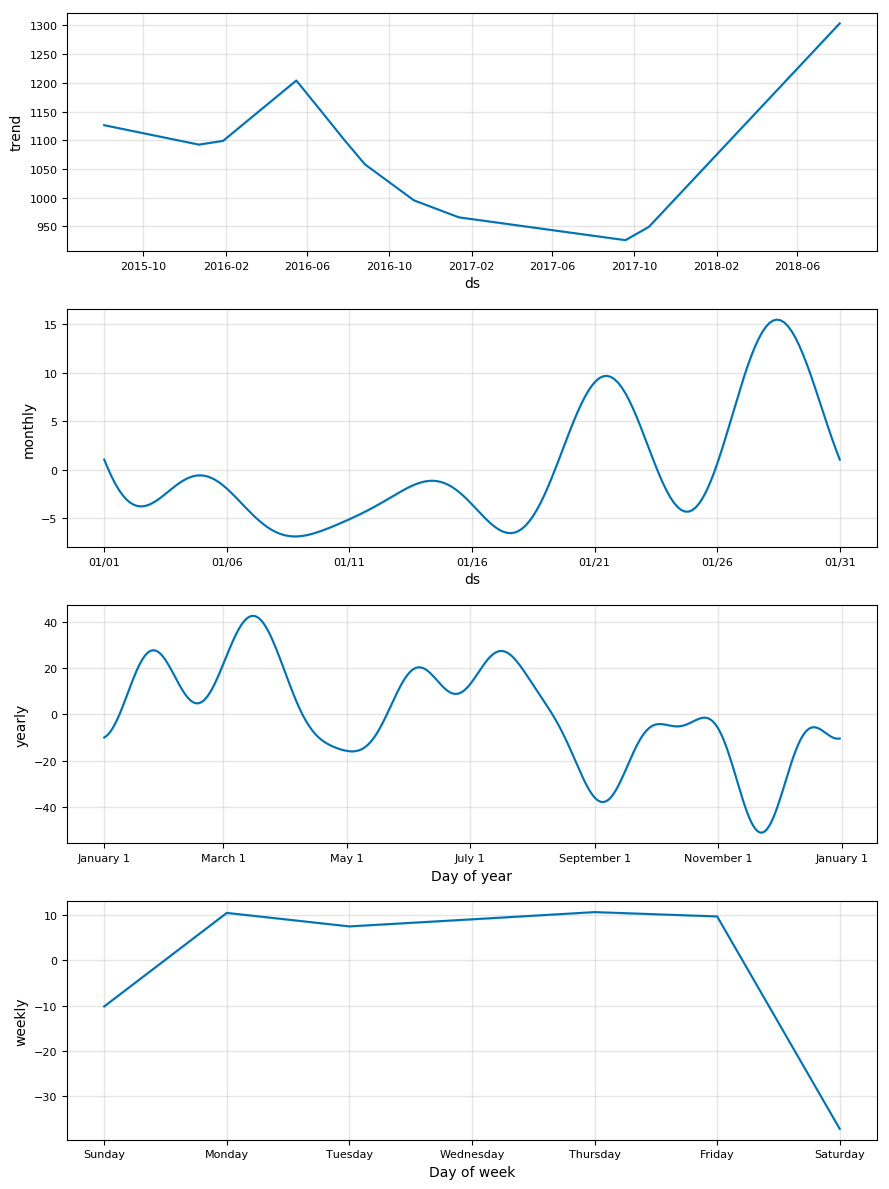

In [15]:
model.plot_components(model_data)
plt.show()

We have added a weekly component into the data. We can ignore the weekends because trading only occurs during the week (prices do slightly change overnight because of after-market trading, but the differences are small enough to not make affect our analysis). There is therefore no trend during the week. This is to be expected because on a short enough timescale, the movements of the market are essentially random. It is only be zooming out that we can see the overall trend. Even on a yearly basis, there might not be many patterns that we can discern. The message is clear: playing the daily stock market should not make sense to a data scientist! 

In [0]:
# Turn off the weekly seasonality because it clearly did not work! 
ticker.weekly_seasonality=False

# Changepoints

One of the most important concepts in a time-series is changepoints. These occur at the maximum value of the second derivative. If that doesn't make much sense, they are times when the series goes from increasing to decreasing or vice versa, or when the series goes from increasing slowly to increasing rapidly. 

We can easily view the changepoints identified by the Prophet model with the following method. This lists the changepoints and displays them on top of the actual data for comparison.

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/content/AI-Adventures-3/stocksAnalyzerBackend.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['delta'] = deltas
/content/AI-Adventures-3/stocksAnalyzerBackend.py:735: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['abs_delta'] = abs(c_dat


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
190 2016-05-16     1215.00 -1.878467
524 2017-09-18      909.10  0.657772
119 2016-01-28     1129.60  0.623655
547 2017-10-23      939.50  0.452966
262 2016-08-26     1020.25  0.384247


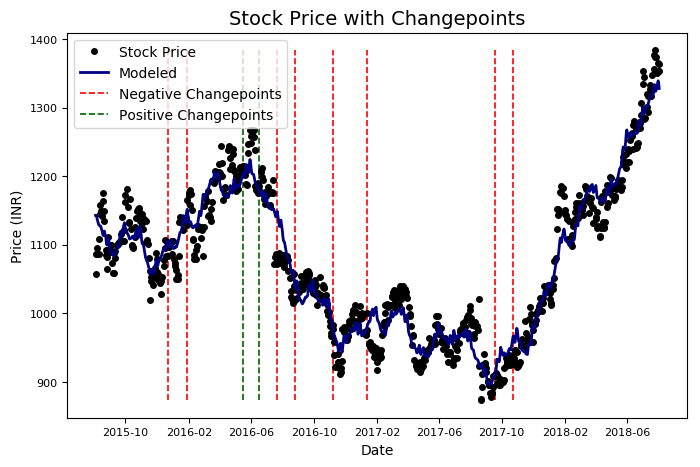

In [14]:
ticker.changepoint_date_analysis()

Prophet only identifies changepoints in the first 80% of the data, but it still gives us a good idea of where the most movement happens. It we wanted, we could look up news about ticker(stock) on those dates and try to corroborate with the changes. However, I would rather have that done automatically so this functionality is there in class. 

If we specify a search term in the call to `changepoint_date_analysis`, behind the scenes, stockTicker will query the Google Search Trends api for that term. The method then displays the top related queries, the top rising queries, and provides a graph. The graph is probably the most valuable part as it shows the frequency of the search term and the changepoints on top of the actual data. This allows us to try and corroborate the search term with either the changepoints or the share price. 

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver


 Top Related Queries: 

                 query  value
0  infosys share price    100

 Rising Related Queries: 

                 query  value
0  infosys share price    200


/content/AI-Adventures-3/stocksAnalyzerBackend.py:797: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  trends = trends.reset_index(level=0)


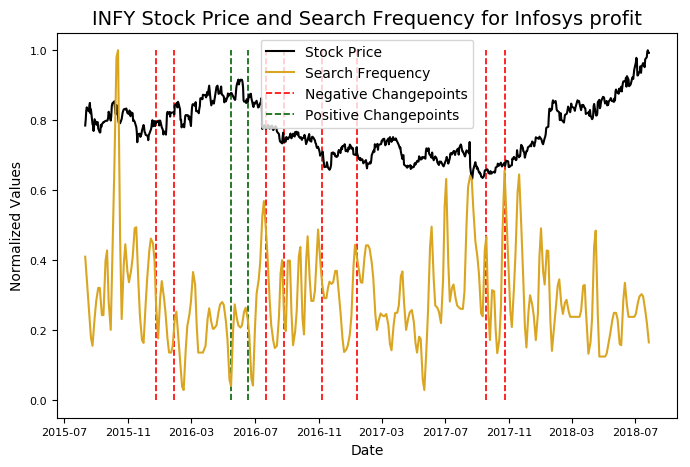

In [6]:
ticker.changepoint_date_analysis(search = 'Infosys profit')

There looks to be more signal in the search frequency graph than noise! I'm sure there may be correlations, but the question is whether there are meaningful causes. We can use any search term we want, and there are likely to be all sorts of correlations that are unexpected but are just noise. It might not be a great idea to assign the search frequency much weight. Nonetheless, it is an interesting exercise! 

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



 Top Related Queries: 

                 query  value
0        infosys share    100
1  infosys share price     95
2                  tcs     21
3       infosys mysore     13
4         infosys news     13

 Rising Related Queries: 

                query  value
0  infosys smart card   8100
1      swathi infosys   7750
2     infosys buyback   5200
3    iconnect infosys   2000
4        sensex today    850


/content/AI-Adventures-3/stocksAnalyzerBackend.py:797: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  trends = trends.reset_index(level=0)


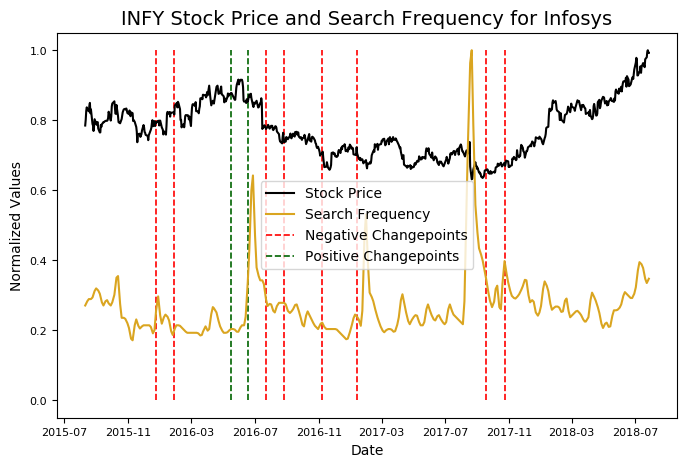

In [5]:
ticker.changepoint_date_analysis(search = 'Infosys')

# Predictions

Now that we have analyzed the stock, the next question is where is it going? For that we will have to turn to predictions! 
That is for another notebook, but here is a little idea of what we can do (check out the documentation on GitHub for full details).

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Predicted Price on 2019-01-30 = INR1575.16


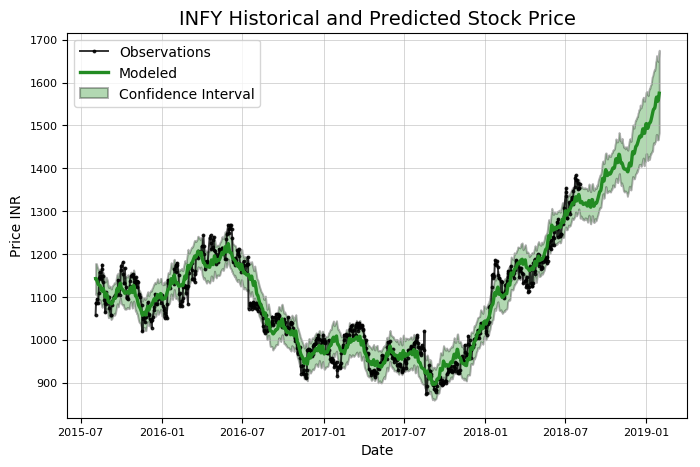

In [6]:
model, future = ticker.create_prophet_model(days=180)